# In-class demo for comparing two samples

In this class, we will determine and run the appropriate test to determine if the hydrogels increase the specificity of cell precision in injections.

In [1]:
# Import packages
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns

### The data

In our hospital, we have 20 patients with the same degenerative heart disease. Our best treatment option is to inject healthy cells that will hopefully integrate with the current heart cells and cure our patients. We ran a clinical trial to test the effect of delivering healthy cells with and without hydrogel encapsulation. The data we collected are shown below.

In [3]:
# Percent improvement of patients receiving cells only.
patients_cellsonly_improvement = [30, 25, 43, 31, 22, 56, 35, 29, 68]

# Percent improvement of patients receiving cells delivered with hydrogels.
patients_hydrogels_improvement = [38, 50, 61, 45, 67, 53, 57, 72, 44]


Text(0, 0.5, 'Percent improvement')

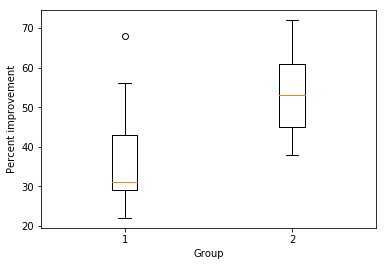

In [5]:
## Plot the data

plt.boxplot([patients_cellsonly_improvement, patients_hydrogels_improvement])
plt.xlabel("Group")
plt.ylabel("Percent improvement")

### What type of test do we use?


In [12]:
## In order to run our test, we need to calculate the following statistics.
## This is a two-sample design!!
## Let's run a two-sample t-test :)

#H_0: The difference between group 1 (cells only) and group 2 (hydrogels) is 0.
#H_A: The difference between group 1 and group 2 is not 0.


patients_cellsonly_mean = np.mean(patients_cellsonly_improvement)
patients_hydrogels_mean = np.mean(patients_hydrogels_improvement)
difference_means = patients_cellsonly_mean - patients_hydrogels_mean
print(difference_means)

# Diff = np.mean(patients_cellsonly…) - np.mean(patients_hydrogels…)

## Calculate the pooled sample variance.
n1 = len(patients_hydrogels_improvement)
n2 = len(patients_cellsonly_improvement)



s1 = np.std(patients_hydrogels_improvement, ddof = 1)
s2 = np.std(patients_cellsonly_improvement, ddof = 1)


sp2 = ((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2)
print(sp2)



-16.44444444444445
180.05555555555557


### Calcuate the standard error


In [13]:
## Standard error

st_err = np.sqrt((sp2/n1)+(sp2/n2))
print(st_err)

6.325531256662348


### Calculate the t-statistic

In [14]:
## t calculated from our data

t = difference_means/st_err
print(t)

-2.5996938086622188


In [7]:
## Calculate using a scipy function to double check our calculations
